In [75]:
import geopandas
import pandas as pd
import matplotlib.pyplot as plt
import shapely
from shapely.geometry import Point, LineString, Polygon
from shapely.geometry import MultiPoint, MultiLineString, MultiPolygon, box

In [2]:
point1 = Point(2.2, 4.2)
point2 = Point(7.2, -25.1)
point3 = Point(9.26, -2.456)
point3D = Point(9.26, -2.456, 0.57)

In [3]:
# Get the coordinates
point_coords = point1.coords
    
# Get x and y coordinates
xy = point_coords.xy

# Get only x coordinates of Point1
x = point1.x

# Whatabout y coordinate?
y = point1.y

In [4]:
point_dist = point1.distance(point2)
point_dist #in degrees decimal

29.723559679150142

In [5]:
print("Distance between the points is {0:.2f} decimal degrees".format(point_dist))

#{0:.2f} must be used with .format(point_dist) as the {} indicate what needs be format
#{0:.2f} specify 2  digits of precision and f  is used to represent floating point number

Distance between the points is 29.72 decimal degrees


In [6]:
line = LineString([point1, point2, point3])
line2 = LineString([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

In [7]:
lxy = line.xy
lxy[1]

array('d', [4.2, -25.1, -2.456])

In [8]:
#extract all the x coord in line
xcoord_line = lxy[0]

# Extract y coordinates straight from the LineObject by referring to a array at index 1
ycoord_line = line.xy[1]

In [9]:
#getting the length of the line
l_length = line.length
l_length

52.46106912939557

In [10]:
#getting the centroid of the line
l_centroid = line.centroid
type(l_centroid)

shapely.geometry.point.Point

In [11]:
#print the length of the line
print("the length of the line is {0:.2f}".format(l_length))

the length of the line is 52.46


In [12]:
#print the centroid location
print("centroid of the line is at", l_centroid)

centroid of the line is at POINT (6.229961354035622 -11.89241115757239)


In [13]:
#print type of centroid
print("centroid type is:", type(l_centroid))

centroid type is: <class 'shapely.geometry.point.Point'>


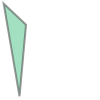

In [21]:
#creating a polygon
poly = Polygon([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])
poly

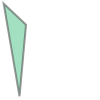

In [20]:
# We can also use our previously created Point objects (same outcome)
# --> notice that Polygon object requires x,y coordinates as input
poly2 = Polygon([[p.x, p.y] for p in [point1, point2, point3]])
poly2
#using an inline for loop to extract the x and y from point1-3

In [25]:
#.geom_type tells you the type of geometry the variable is
poly2.geom_type
type(poly2)

shapely.geometry.polygon.Polygon

In [26]:
#there are double parenthesis in the coordinates
print(poly2)

POLYGON ((2.2 4.2, 7.2 -25.1, 9.26 -2.456, 2.2 4.2))


In [28]:
# Let's create a bounding box of the world and make a whole in it
# First we define our exterior
# creating a list of coordinates first
world_exterior = [(-180, 90), (-180, -90), (180, -90), (180, 90)]
world_exterior

[(-180, 90), (-180, -90), (180, -90), (180, 90)]

In [34]:
# Let's create a single big hole where we leave ten decimal degrees at the boundaries of the world
# Notice: there could be multiple holes, thus we need to provide a list of holes
# define inner boundary list of coordinates
hole = [[(-170, 80), (-170, -80), (170, -80), (170, 80)]]
hole

[[(-170, 80), (-170, -80), (170, -80), (170, 80)]]

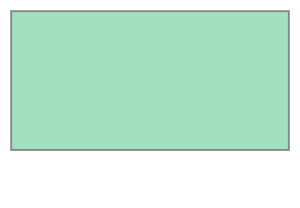

In [44]:
# World without a hole, shell parameters are optional when constructing polygons, shell defines outer boundary
# if you include shell and then add coordinates it will still compute the shape. shell is by default added in 
# parameter. shell = [(coordinates1),(coordinates2),(coordinate3)]
world = Polygon(shell=world_exterior)
world

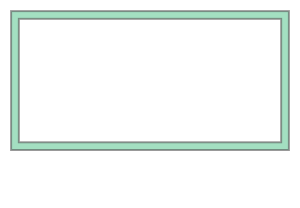

In [45]:
# Now we can construct our Polygon with the hole inside
world_has_a_hole = Polygon(shell=world_exterior, holes=hole)
world_has_a_hole

In [46]:
print(world)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90))


In [47]:
#shows 2 tuples of coordinates in the polygon
print(world_has_a_hole)

POLYGON ((-180 90, -180 -90, 180 -90, 180 90, -180 90), (-170 80, -170 -80, 170 -80, 170 80, -170 80))


In [48]:
type(world_has_a_hole)

shapely.geometry.polygon.Polygon

In [66]:
#get the centroid of the polygon world
world_cent = world.centroid
print('World Centroid is: ', world_cent)

World Centroid is:  POINT (-0 -0)


In [68]:
#area of world
world_area = world.area
print('Polygon area: ',world_area)

Polygon area:  64800.0


In [69]:
#get the bounding box of the polygon
world_bound = world.bounds
print('Polygon bounding box:',world_bound)

Polygon bounding box: (-180.0, -90.0, 180.0, 90.0)


In [71]:
# Get the exterior of the Polygon, returns a linstring
# captures only the exterior line of polygon, does not work on donut polygons
world_ext = world.exterior
print('Polygon exterior is:',world_ext)


Polygon exterior is: LINEARRING (-180 90, -180 -90, 180 -90, 180 90, -180 90)


In [73]:
#getting the perimeter length, uses length function on the world exterior linestring variable
world_perimeter = world_ext.length
print('Polygon exterior length: ', world_perimeter)

Polygon exterior length:  1080.0


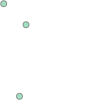

In [77]:
# Create a MultiPoint object of our points 1,2 and 3
multi_point = MultiPoint([point1, point2, point3])
multi_point

In [78]:
# It is also possible to pass coordinate tuples inside
multi_point2 = MultiPoint([(2.2, 4.2), (7.2, -25.1), (9.26, -2.456)])

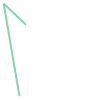

In [88]:
# We can also create a MultiLineString with two lines
line1 = LineString([point1, point2])

line2 = LineString([point2, point3])

#mulitlinestrings can be created with multiple tuples
multi_line2 = MultiLineString([[(2.2, 4.2), (7.2, -25.1)], [(2.2, 4.2), (9.26, -2.456)]])
mulit_line = MultiLineString([line, line2])
multi_line2

In [90]:
# MultiPolygon can be done in a similar manner
# Let's divide our world into western and eastern hemispheres with a hole on the western hemisphere
# --------------------------------------------------------------------------------------------------
# Let's create the exterior of the western part of the world
west_exterior = [(-180, 90), (-180, -90), (0, -90), (0, 90)]
west_exterior

[(-180, 90), (-180, -90), (0, -90), (0, 90)]

In [91]:
# Let's create a hole --> remember there can be multiple holes, thus we need to have a list of hole(s).
# Here we have just one.
west_hole = [[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]
west_hole

[[(-170, 80), (-170, -80), (-10, -80), (-10, 80)]]

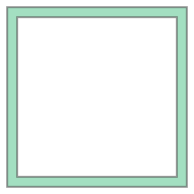

In [92]:
west_poly = Polygon(shell=west_exterior, holes=west_hole)
west_poly

In [117]:
# Let's create the Polygon of our Eastern hemisphere polygon using bounding box
# For bounding box we need to specify the lower-left corner coordinates and upper-right coordinates
# can create mulitple variables in one line the, their assignments will assign to the variable in their respective
# order written after the =
min_x, min_y = 0, -90


In [118]:
max_x, max_y = 180, 90

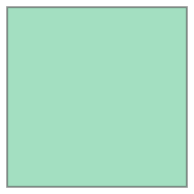

In [119]:
# Create the polygon using box() function
east_poly_box = box(minx=min_x, miny=min_y, maxx=max_x, maxy=max_y)
east_poly_box

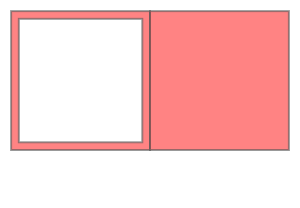

In [120]:
# Let's create our MultiPolygon. We can pass multiple Polygon -objects into our MultiPolygon as a list
multi_poly = MultiPolygon([west_poly, east_poly_box])
multi_poly

In [102]:
print("MultiPoly:", multi_poly)

MultiPoly:  MULTIPOLYGON (((-180 90, -180 -90, 0 -90, 0 90, -180 90), (-170 80, -170 -80, -10 -80, -10 80, -170 80)), ((180 -90, 180 90, 0 90, 0 -90, 180 -90)))


In [103]:
print("Multiline:", multi_line)

Multiline:  MULTILINESTRING ((2.2 4.2, 7.2 -25.1), (2.2 4.2, 9.26 -2.456))


In [105]:
print('Multipoint:', multi_point)

Multipoint: MULTIPOINT (2.2 4.2, 7.2 -25.1, 9.26 -2.456)


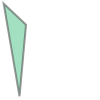

In [106]:
# Convex Hull of our MultiPoint --> https://en.wikipedia.org/wiki/Convex_hull
convex = multi_point.convex_hull
convex

In [108]:
# How many lines do we have inside our MultiLineString?
lines_count = len(multi_line)
lines_count

2

In [109]:
# Let's calculate the area of our MultiPolygon
multi_poly_area = multi_poly.area
multi_poly_area

39200.0

In [110]:
# We can also access different items inside our geometry collections. We can e.g. access a single polygon from
# our MultiPolygon -object by referring to the index
# Let's calculate the area of our Western hemisphere (with a hole) which is at index 0
west_area = multi_poly[0].area
west_area

6800.0

In [116]:
# We can check if we have a "valid" MultiPolygon. MultiPolygon is thought as valid if the individual polygons
# does notintersect with each other. Here, because the polygons have a common 0-meridian, we should NOT have
# a valid polygon. This can be really useful information when trying to find topological errors from your data
valid = multi_poly.is_valid
valid

#if the min_x was set to 10 then the validation would be true because east_box is shifted to the right not touching
#the west

True